In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import scraping_functions
import locale
import time
import wikipediaapi
from graph_tool.all import *
from datetime import datetime
from bs4 import BeautifulSoup
from collections import Counter
locale.setlocale(locale.LC_TIME, 'en_US.UTF-8');



In [3]:
with open('data/artist_announcements_dict.json') as file:
    arti = json.load(file)
    
'''
all_edges = []
for artist in arti:
    ann_list = artist['announcements']
    ann_list.sort(key = lambda x: datetime.strptime(x['announcement_date'], '%B %d, %Y'))
    all_edges.extend([(ann_list[i]['subtitle'], ann_list[i+1]['subtitle']) for i in range(len(ann_list)-1)])
'''

nw_artist_list = []
for artist in arti:
    nw_artist_list.append(artist['name'])


[{'name': '!Mediengruppe Bitnik',
  'announcements': [{'id': 394341,
    'link': '/announcements/394341/augmented-authorship/',
    'title_artists': None,
    'title': 'Augmented Authorship',
    'subtitle': 'HeK (House of Electronic Arts Basel)',
    'announcement_date': 'May 15, 2021'},
   {'id': 59150,
    'link': '/announcements/59150/mediengruppe-bitnikjusqu-ici-tout-va-biennelly-halitijours-mois-annes/',
    'title_artists': '!Mediengruppe Bitnik, Jusqu’ici tout va bien, Nelly Haliti',
    'title': 'Jusqu’ici tout va bien',
    'subtitle': 'Centre culturel suisse, Paris',
    'announcement_date': 'September 20, 2016'}]},
 {'name': '(LA)HORDE',
  'announcements': [{'id': 530904,
    'link': '/announcements/530904/la-horde/',
    'title_artists': None,
    'title': '(LA)HORDE',
    'subtitle': 'Julia Stoschek Foundation',
    'announcement_date': 'April 24, 2023'}]},
 {'name': '(Un)usual Business',
  'announcements': [{'id': 4281,
    'link': '/announcements/4281/we-are-the-time-ma

['!Mediengruppe Bitnik',
 '(LA)HORDE',
 '(Un)usual Business',
 '1000 BCE',
 '3as4',
 '4space',
 '98weeks Belgrade',
 '9eme collectif des Sans Papier',
 ':mentalKLINIK',
 'A Constructed World',
 'A Kassen',
 'A. L. Steiner',
 'A. Laurie Palmer',
 'A.J. Lode Janssens',
 'A.K. Burns',
 'A.L. Steiner',
 'A.R. Penck',
 'A.S. Byatt',
 'A12',
 'AA',
 'AA Bronson',
 'AAA',
 'AAP',
 'ABACT',
 'ABC',
 'ACC',
 'ACCA',
 'ACPA',
 'ACT',
 'ADA',
 'ADAGP',
 'ADAM',
 'ADL',
 'ADM',
 'AECID',
 'AES',
 'AES+F',
 'AFI',
 'AFK',
 'AGLAIA KONRAD',
 'AHRC',
 'AHVA',
 'AIA',
 'AICA',
 'AICAD',
 'AKRAM ZAATARI',
 'ALBERT OEHLEN',
 'ALESSANDRO PESSOLI',
 'ALI SMITH',
 'ALICE',
 'ALTHEA THAUBERGER',
 'AMA',
 'AMO',
 'ANDREAS GURSKY',
 'ANDREW ROSS',
 'ANDY WARHOL',
 'ANISH KAPOOR',
 'ANN DEMEESTER',
 'ANNIKA LARSSON',
 'ANTONI MUNTADAS',
 'ANTONIA HIRSCH',
 'APA',
 'AR',
 'ARC',
 'ARCH',
 'ARCO',
 'ARCOmadrid',
 'ARGOS',
 'ART',
 'ART CLUB2000',
 'ARTEK',
 'ARTER',
 'ARTSPACE',
 'ARTSPEAK',
 'ARTUR ZMIJEWSKI',


In [5]:
df = pd.read_csv('data/df_artists_auction.csv')
au_artist_list = list(df.artist)
au_artist_list

['A A Raiba',
 'A Ackerberg',
 'A Adamson',
 'A Aenin',
 'A Babron',
 'A Baccalario',
 'A Bacci',
 'A Bacherini',
 'A Bachmann',
 'A Balasubramaniam',
 'A Borgaet van Aerssen',
 'A Caizac',
 'A Cajoni',
 'A Calame',
 'A Callcott',
 'A Cambio',
 'A Camm',
 'A Campbell',
 'A Corsi Lalli',
 'A D Macallister',
 'A Dadure',
 'A E Cremer',
 'A Eberhardt',
 'A Eder',
 'A Egorov',
 'A Farre Pinos',
 'A G Schultz & Co.',
 'A H',
 'A H G',
 'A K',
 'A Kassen',
 'A Laevens',
 'A Lambert',
 'A Lambourg',
 'A Lao',
 'A M',
 'A M Macdonald',
 'A M Walters',
 'A Maffei',
 'A Pagliara',
 'A Paja',
 'A Panatta',
 'A Rajeswara Rao',
 'A Ramachandran',
 'A Ramirez',
 'A Rasmussen',
 'A Sun Wu',
 'A Wagdorp',
 'A Wagner',
 'A Wallaert',
 'A Walther',
 "A d'Alma",
 "A d'Ambrossi",
 'A de Farretti',
 'A de Ranieri',
 'A de la Falhouze',
 'A van Dam',
 "A'erbai",
 'A-One',
 'A.CE',
 'A1one',
 'ACKMe',
 'AES + F',
 'Aaron Baker',
 'Aarre Aaltonen',
 'Aart Lamberts',
 'Ab the Flagman',
 'Abalal Rahiman',
 'Aba

In [15]:
url = "https://raw.githubusercontent.com/me9hanics/PainterPalette/main/PainterPalette.csv"
df_mihaly = pd.read_csv(url)
mi_artist_list = list(df_mihaly.artist)
mi_artist_list

['Bracha L. Ettinger',
 'William H. Johnson',
 'Alexey  Bogolyubov',
 'O. Louis Guglielmi',
 'Mikalojus Konstantinas Ciurlionis',
 'Edward E. Simmons',
 'Robert G. Harris',
 'Friedrich Vordemberge-Gildewart',
 'Edward R. Taylor',
 'Carl-Ludwig Johann Christineck',
 'Friedrich Schroder-Sonnenstern',
 'D. Jeffrey Mims',
 'Nuno Gonçalves',
 'Alexander Khvostenko-Khvostov',
 'Jose Ferraz de Almeida Junior',
 'Frank W. Benson',
 'Maria Helena Vieira da Silva',
 'Jean-Baptiste-Simeon Chardin',
 'Eleanor Fortescue-Brickdale',
 'Alexander Bazhbeuk-Melikyan',
 'Georges Ribemont-Dessaignes',
 'Alexandre-Jacques Chantron',
 'Manuel Rodriguez de Guzman',
 'Rudolf Schweitzer-Cumpana',
 'Andre Dunoyer de Segonzac',
 'Ivan-Valentyn Zadorozhny',
 'Anna Ostroumova-Lebedeva',
 'Cristovao de Figueiredo',
 'Juan Carreno de Miranda',
 'Jorge González Camarena',
 'Aladar Korosfoi-Kriesch',
 'Giuseppe Pinot-Gallizio',
 'M.F. Husain',
 'Nikolay Bogdanov-Belsky',
 'Iain Baxter&',
 'Gerhard von Graevenitz',
 '

In [17]:
in_artist_list = set(nw_artist_list).intersection(set(au_artist_list))
print(f'nw: {len(nw_artist_list)}\nau: {len(au_artist_list)}\njoint: {len(in_artist_list)}\n')
in_artist_list

in2_artist_list = set(nw_artist_list).intersection(set(mi_artist_list))
print(f'nw: {len(nw_artist_list)}\nmi: {len(mi_artist_list)}\njoint: {len(in2_artist_list)}\n')
in2_artist_list

in3_artist_list = set(au_artist_list).intersection(set(mi_artist_list))
print(f'au: {len(au_artist_list)}\nmi: {len(mi_artist_list)}\njoint: {len(in3_artist_list)}\n')
in3_artist_list

nw: 21350
au: 8180
joint: 183

nw: 21350
mi: 10549
joint: 1043

au: 8180
mi: 10549
joint: 326



{'A1one',
 'Abraham Palatnik',
 'Abraham Rademaker',
 'Acee Blue Eagle',
 'Adel Abdessemed',
 'Adolf Eberle',
 'Affandi',
 'Afro',
 'Albert Edelfelt',
 'Albert Paley',
 'Alberto Giacometti',
 'Albin Egger-Lienz',
 'Albrecht Adam',
 'Albrecht Durer',
 'Alexander Adriaenssen',
 'Alexander Calder',
 'Alexandre Cabanel',
 'Alexis Bafcop',
 'Alfred Wallis',
 'Alice Baber',
 'Alice Bailly',
 'Alice Rahon',
 'Allan Ramsay',
 'Alvar Aalto',
 'Andre Cadere',
 'Andreas Achenbach',
 'Andries Daniels',
 'Andy Warhol',
 'Angus Fairhurst',
 'Anna Eggert',
 'Ansel Adams',
 'Anthonie Palamedes',
 'Anton Faistauer',
 'Antonio Abondio',
 'Antonio Calderara',
 'Antonio Dacosta',
 'Antonio Paoletti',
 'Arnulf Rainer',
 'Artemisia Gentileschi',
 'Arthur Rackham',
 'August Macke',
 'Augustin Pajou',
 'Augustus Earle',
 'Bada Shanren',
 'Bartholomew Dandridge',
 'Bas Jan Ader',
 'Ben',
 'Ben Eine',
 'Berenice Abbott',
 'Bernardo Daddi',
 'Blinky Palermo',
 'C215',
 'Cagnaccio di San Pietro',
 'Captain Willia

In [7]:
lang_dict = {'Spanish': 'es',
             'American': 'en',
             'French': 'fr',
             'British': 'en',
             'Italian': 'it',
             'German': 'de',
             'Chinese': 'zh',
             'Dutch': 'nl',
             'Austrian': 'de',
             'Belgian': 'nl',
             'Norwegian': 'no',
             'Swiss': 'de',
             'Swedish': 'sv',
             'Australian': 'en',
             'Canadian': 'en',
             'Danish': 'da',
             'Russian': 'ru',
             'Irish': 'en',
             'Finnish': 'fi',
             'NewZealand': 'en',
             'Indian': 'hi',
             'Scottish': 'en',
             'Hungarian': 'hu',
             'Polish': 'pl',
             'Flemish': 'en',
             'Argentine': 'sp',
             'Czech': 'cs',
             'Israeli': 'he',
             'Iranian': 'fa',
             'Greek': 'el',
             'SouthAfrican': 'en',
             'Mexican': 'sp',
             'Brazilian': 'pt',
             'Moroccan': 'ar',
             'Japanese': 'ja',
             'Cuban': 'es',
             'Indonesian': 'id',
             'Lebanese': 'ar',
             'Portuguese': 'pt',
             'Romanian': 'ro',
             'Syrian': 'ar',
             'Nigerian': 'en',
             'Korean': 'ko'}

wiki_dict = {}
for lang in set(lang_dict.values()):
    wiki_dict[lang] = wikipediaapi.Wikipedia('Artists_scrapper (timonov_artem@student.ceu.edu)',
                                             lang, extract_format=wikipediaapi.ExtractFormat.HTML)
    
with open('data/announcements.json') as file:
    anns = json.load(file)

for id in anns.keys():
    anns[id]['id'] = id
anns_list = [value for value in anns.values()]
df = pd.json_normalize(anns_list)
df.set_index('id', inplace=True)
df.drop('title_artists', inplace=True, axis=1)
df.dropna(inplace=True)
df['date'] = df.announcement_date.apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
# nodes = list(df.subtitle.value_counts().index)
nodes = list(df.subtitle.value_counts().index)
nodes_dict = {nodes[i]: i for i in range(len(nodes))}
nodes_mentions_dict = dict(df.subtitle.value_counts())
nodes_mentions_dict
df_inst = df[['subtitle', 'title']].groupby('subtitle').count()
df_inst

,title
subtitle,
(e)merge art fair,3
.doc:LAB II/SABANCI,1
1/9 unosunove,1
101/EXHIBIT,2
14-18 NOW,1
...,...
"École des Arts Décoratifs, Paris",1
École des Beaux-Arts de Bordeaux,2
École des Hautes Études en Sciences Sociales,2


In [8]:
start_time = time.time()
count_errors_en = 0
counter = 0
for artist in df_inst.index:
    if (counter % 10 == 0) and counter < 100:
        print(f'{counter} of {len(df_inst)}')
    if counter % 1000 == 0:
        print(f'{counter} of {len(df_inst)}')
    counter += 1
    page = wiki_dict['en'].page(artist.replace(' ','_'))
    try:
        if (page.exists() == True):
            df_inst.loc[artist, 'wiki_length_en'] = len(page.text)
        else:
            df_inst.loc[artist, 'wiki_length_en'] = 0
    except:
        df_inst.loc[artist, 'wiki_length_en'] = 0
        count_errors_en += 1
time_spent_en = time.time() - start_time
print(f'For artists there was {count_errors_en} errors, it took {time_spent_en} seconds.')

df_inst.to_csv('df_inst.csv')


0 of 5356
0 of 5356
10 of 5356
20 of 5356
30 of 5356
40 of 5356
50 of 5356
60 of 5356
70 of 5356
80 of 5356
90 of 5356
1000 of 5356
2000 of 5356
3000 of 5356
4000 of 5356
5000 of 5356
For artists there was 0 errors, it took 1318.2394456863403 seconds.


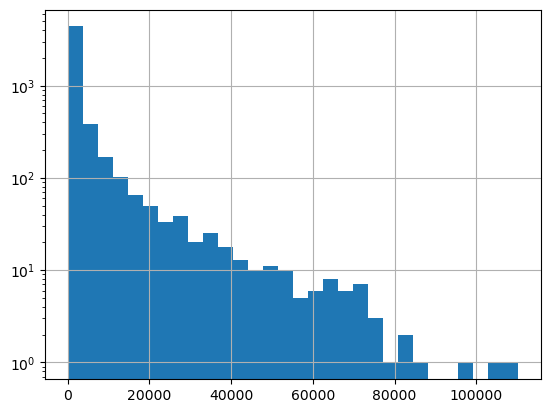

In [11]:
fig, ax = plt.subplots()
df_inst.wiki_length_en.hist(ax=ax, bins=30)
ax.set_yscale('log')

In [10]:
df_inst.sort_values('wiki_length_en').tail(60)

,title,wiki_length_en
subtitle,,
Northeastern University,6,48884.0
Purdue University,1,48923.0
"University of California, Davis",10,49529.0
University of Maryland Baltimore County,8,49873.0
Texas A&M University,1,50090.0
University of Oregon,10,50408.0
foam,1,50609.0
Spacex,3,51172.0
University of Toronto,6,51835.0
